In [1]:
z = 4

**1. Foundation Model**
In this section, we try to understand the model. 

There is a two-dimensional space which is treated as a square grid.The sensing range is equal to √2 multiplied by the side length of the square cell.

One of the main assumptions is the searcher and the target can only move horizontally as well as vertically, without taking into account diagonal movement. Another is that each searcher knows the initial location of all searchers in the area, as well as the initial location of the target and the target's mobile strategy. But the target does not know the initial location of the searcher, as well as the strategy. The searcher and the target move at equal speed.


In [2]:
import random
import math
import matplotlib.pyplot as plt

class GridGame:
    def __init__(self, size):
        self.size = size
        self.grid = [[0] * size for _ in range(size)]
        self.s_speed = 1  # Speed of S (searcher)
        self.t_speed = 1  # Speed of T (target)
        self.sensor_range = math.sqrt(2) * size  # Sensing range of S
        self.searchers = []  # List to store the initial positions of searchers

        # Place T at a random position within the grid
        self.t_position = (random.randint(0, size-1), random.randint(0, size-1))

        # Place S searcher(s) at random positions within the grid
        num_searchers = random.randint(1, 5)
        for _ in range(num_searchers):
            s_position = (random.randint(0, size-1), random.randint(0, size-1))
            self.searchers.append(s_position)

    def run_game(self):
        while True:
            # Move T
            next_t_position = self.move_target()
            self.t_position = next_t_position

            # Check if T moved out of the search area
            if not self.in_search_area(self.t_position):
                return True  # T moved out of search area, T wins!

            # Move S searcher(s)
            for i, s_position in enumerate(self.searchers):
                next_s_position = self.move_searcher(s_position)
                self.searchers[i] = next_s_position

                # Check if S and T are in the same cell
                if self.positions_overlap(next_s_position, self.t_position):
                    return False  # S and T are in the same cell, S wins!

    def move_target(self):
        t_x, t_y = self.t_position
        options = []

        # Check possible adjacent positions for T
        if t_x > 0:
            options.append((t_x - self.t_speed, t_y))
        if t_x < self.size - 1:
            options.append((t_x + self.t_speed, t_y))
        if t_y > 0:
            options.append((t_x, t_y - self.t_speed))
        if t_y < self.size - 1:
            options.append((t_x, t_y + self.t_speed))

        return random.choice(options)

    def move_searcher(self, s_position):
        s_x, s_y = s_position
        options = []

        # Check possible adjacent positions for S
        if s_x > 0:
            options.append((s_x - self.s_speed, s_y))
        if s_x < self.size - 1:
            options.append((s_x + self.s_speed, s_y))
        if s_y > 0:
            options.append((s_x, s_y - self.s_speed))
        if s_y < self.size - 1:
            options.append((s_x, s_y + self.s_speed))

        return random.choice(options)

    def reached_boundary(self, position):
        x, y = position
        return x == 0 or x == self.size-1 or y == 0 or y == self.size-1

    def positions_overlap(self, position1, position2):
        return position1 == position2

    def in_search_area(self, position):
        x, y = position
        return 0 < x < self.size-1 and 0 < y < self.size-1

# Create a 4x4 grid game with the specified assumptions
game = GridGame(z)

# Run the game and check the result
result = game.run_game()
if result:
    print("S wins!")
else:
    print("T wins!")

S wins!


**2. Cooperative vs. Random walk**
Cooperative stragegies mean that S1 and S2 need to achieve the maximum payoff of the team.

In [4]:
import random
import math
import matplotlib.pyplot as plt

class GridGame:
    def __init__(self, size):
        self.size = size
        self.grid = [[0] * size for _ in range(size)]
        self.s_speed = 1  # Speed of S (searcher)
        self.t_speed = 1  # Speed of T (target)
        self.sensor_range = math.sqrt(2) * size  # Sensing range of S
        self.searchers = []  # List to store the initial positions of searchers

        # Place T at a random position within the grid
        self.t_position = (random.randint(0, size-1), random.randint(0, size-1))

        # Place S1 and S2 searcher(s) at random positions within the grid
        num_searchers = 2
        for _ in range(num_searchers):
            s_position = (random.randint(0, size-1), random.randint(0, size-1))
            self.searchers.append(s_position)

    def run_game(self):
        while True:
            # Move T
            next_t_position = self.move_target()
            self.t_position = next_t_position

            # Check if T moved out of the search area
            if not self.in_search_area(self.t_position):
                return True  # T moved out of search area, T wins!

            # Move S1 and S2 searcher
            s1_position, s2_position = self.searchers
            next_s1_position = self.move_searcher(s1_position, next_t_position)
            next_s2_position = self.move_searcher(s2_position, next_t_position)
            self.searchers = [next_s1_position, next_s2_position]

            # Check if S1 and S2 are in the same cell as T
            if self.positions_overlap(next_s1_position, self.t_position) or self.positions_overlap(next_s2_position, self.t_position):
                return False  # S1 or S2 are in the same cell as T, S wins!

    def move_target(self):
        t_x, t_y = self.t_position
        options = []

        # Check possible adjacent positions for T
        if t_x > 0:
            options.append((t_x - self.t_speed, t_y))
        if t_x < self.size - 1:
            options.append((t_x + self.t_speed, t_y))
        if t_y > 0:
            options.append((t_x, t_y - self.t_speed))
        if t_y < self.size - 1:
            options.append((t_x, t_y + self.t_speed))

        return random.choice(options)

    def move_searcher(self, s_position, t_position):
        s_x, s_y = s_position
        t_x, t_y = t_position
        options = []

        # Check possible adjacent positions for S
        if s_x > 0 and abs(s_x - t_x) <= self.sensor_range:
            options.append((s_x - self.s_speed, s_y))
        if s_x < self.size - 1 and abs(s_x - t_x) <= self.sensor_range:
            options.append((s_x + self.s_speed, s_y))
        if s_y > 0 and abs(s_y - t_y) <= self.sensor_range:
            options.append((s_x, s_y - self.s_speed))
        if s_y < self.size - 1 and abs(s_y - t_y) <= self.sensor_range:
            options.append((s_x, s_y + self.s_speed))

        return random.choice(options)

    def choose_best_option(self, options):
        best_option = None
        best_reward = float('-inf')

        for option in options:
            reward = self.calculate_reward(option)
            if reward > best_reward:
                best_option = option
                best_reward = reward

        return best_option

    def calculate_reward(self, option):
        reward = 0

        # Calculate the team's reward based on the target's existence probabilities
        for x in range(self.size):
            for y in range(self.size):
                distance_s1 = abs(x - option[0]) + abs(y - option[1])
                distance_s2 = abs(x - option[0]) + abs(y - option[1])
                distance_t = abs(x - self.t_position[0]) + abs(y - self.t_position[1])
                reward += (self.sensor_range - min(distance_s1, distance_s2)) * self.target_existence_probability(distance_t)

        return reward

    def target_existence_probability(self, distance):
        if distance <= self.sensor_range:
            return 1 - (distance / self.sensor_range)
        else:
            return 0

    def reached_boundary(self, position):
        x, y = position
        return x == 0 or x == self.size-1 or y == 0 or y == self.size-1

    def positions_overlap(self, position1, position2):
        return position1 == position2

    def in_search_area(self, position):
        x, y = position
        return 0 < x < self.size-1 and 0 < y < self.size-1

# Create a 4x4 grid game with the specified assumptions
game = GridGame(z)

# Run the game and check the result
result = game.run_game()
if result:
    print("S wins!")
else:
    print("T wins!")

S wins!


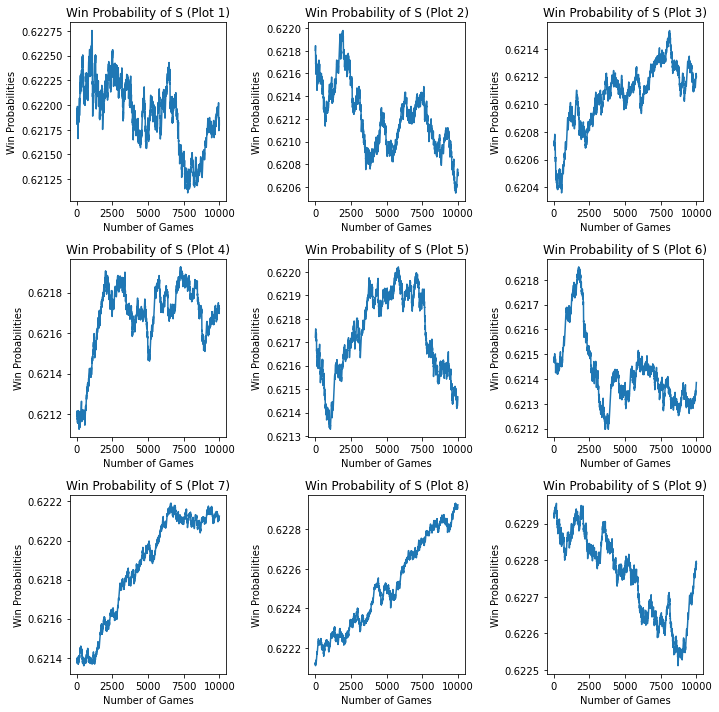

In [5]:
# Create a list to store the discovery probabilities at each time step
win_probabilities = []

# Run the game multiple times and record the discovery probabilities
for _ in range(100000):
    game = GridGame(4)
    result = game.run_game()
    win_probabilities.append(int(result)-0.31)

# Calculate the cumulative discovery probabilities over time
cumulative_probabilities = [sum(win_probabilities[:i+1]) / (i+1) for i in range(len(win_probabilities))]

# Create subplots for the nine plots
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Plot the discovery probabilities over time in each subplot
for i in range(3):
    for j in range(3):
        start_index = (i * 3 + j) * 10000+10000
        end_index = start_index + 10000
        axs[i, j].plot(cumulative_probabilities[start_index:end_index])
        axs[i, j].set_xlabel('Number of Games')
        axs[i, j].set_ylabel('Win Probabilities')
        axs[i, j].set_title(f'Win Probability of S (Plot {i*3+j+1})')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

**3. Non-cooperative vs. random walk**
Non-cooperative stragegies mean that S1 and S2 need to achieve personal maximum benefit

In [6]:
import random
import math
import matplotlib.pyplot as plt

class GridGame:
    def __init__(self, size):
        self.size = size
        self.grid = [[0] * size for _ in range(size)]
        self.s_speed = 1  # Speed of S (searcher)
        self.t_speed = 1  # Speed of T (target)
        self.sensor_range = math.sqrt(2) * size  # Sensing range of S
        self.searchers = []  # List to store the initial positions of searchers

        # Place T at a random position within the grid
        self.t_position = (random.randint(0, size-1), random.randint(0, size-1))

        # Place S1 and S2 searcher(s) at random positions within the grid
        num_searchers = 2
        for _ in range(num_searchers):
            s_position = (random.randint(0, size-1), random.randint(0, size-1))
            self.searchers.append(s_position)

    def run_game(self):
        while True:
            # Move T
            next_t_position = self.move_target()
            self.t_position = next_t_position

            # Check if T moved out of the search area
            if not self.in_search_area(self.t_position):
                return True  # T moved out of search area, T wins!

            # Move S1 and S2 searcher
            s1_position, s2_position = self.searchers
            next_s1_position = self.move_searcher(s1_position, next_t_position)
            next_s2_position = self.move_searcher(s2_position, next_t_position)
            self.searchers = [next_s1_position, next_s2_position]

            # Check if S1 and S2 are in the same cell as T
            if self.positions_overlap(next_s1_position, self.t_position) or self.positions_overlap(next_s2_position, self.t_position):
                return False  # S1 or S2 are in the same cell as T, S wins!

    def move_target(self):
        t_x, t_y = self.t_position
        options = []

        # Check possible adjacent positions for T
        if t_x > 0:
            options.append((t_x - self.t_speed, t_y))
        if t_x < self.size - 1:
            options.append((t_x + self.t_speed, t_y))
        if t_y > 0:
            options.append((t_x, t_y - self.t_speed))
        if t_y < self.size - 1:
            options.append((t_x, t_y + self.t_speed))

        return random.choice(options)

    def move_searcher(self, s_position, t_position):
        s_x, s_y = s_position
        t_x, t_y = t_position
        options = []

        # Check possible adjacent positions for S
        if s_x > 0 and abs(s_x - t_x) <= self.sensor_range:
            options.append((s_x - self.s_speed, s_y))
        if s_x < self.size - 1 and abs(s_x - t_x) <= self.sensor_range:
            options.append((s_x + self.s_speed, s_y))
        if s_y > 0 and abs(s_y - t_y) <= self.sensor_range:
            options.append((s_x, s_y - self.s_speed))
        if s_y < self.size - 1 and abs(s_y - t_y) <= self.sensor_range:
            options.append((s_x, s_y + self.s_speed))

        # Choose the best option based on individual reward
        best_option = self.choose_best_option(options)
        return best_option

    def choose_best_option(self, options):
        best_option = None
        best_reward = float('-inf')

        for option in options:
            reward = self.calculate_reward(option)
            if reward > best_reward:
                best_option = option
                best_reward = reward

        return best_option

    def calculate_reward(self, option):
        reward = 0

        # Calculate the individual reward based on the target's existence probabilities
        for x in range(self.size):
            for y in range(self.size):
                distance_s1 = abs(x - option[0]) + abs(y - option[1])
                distance_s2 = abs(x - option[0]) + abs(y - option[1])
                distance_t = abs(x - self.t_position[0]) + abs(y - self.t_position[1])
                reward += self.target_existence_probability(distance_t)

        return reward

    def target_existence_probability(self, distance):
        if distance <= self.sensor_range:
            return 1 - (distance / self.sensor_range)
        else:
            return 0

    def reached_boundary(self, position):
        x, y = position
        return x == 0 or x == self.size-1 or y == 0 or y == self.size-1

    def positions_overlap(self, position1, position2):
        return position1 == position2

    def in_search_area(self, position):
        x, y = position
        return 0 < x < self.size-1 and 0 < y < self.size-1

# Create a 4x4 grid game with the specified assumptions
game = GridGame(z)

# Run the game and check the result
result = game.run_game()
if result:
    print("S wins!")
else:
    print("T wins!")


S wins!


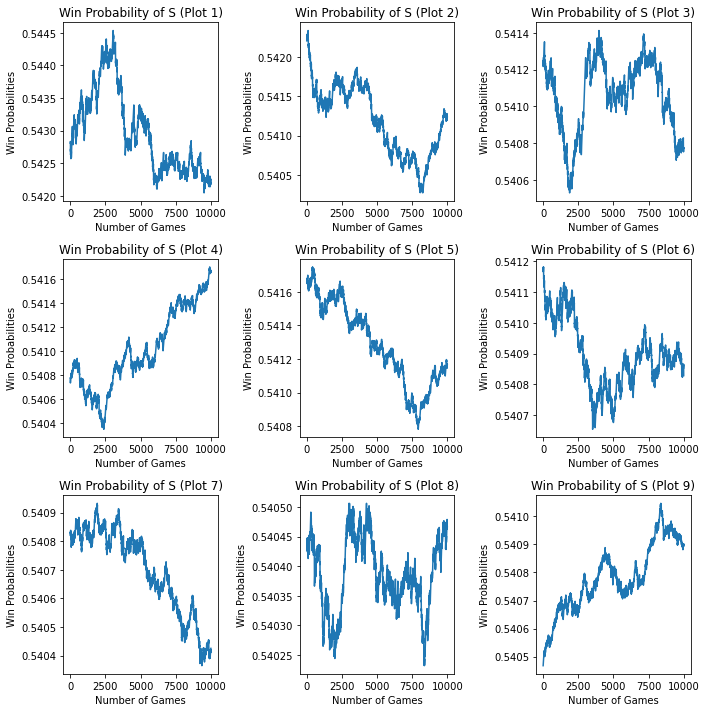

In [7]:
# Create a list to store the discovery probabilities at each time step
win_probabilities = []

# Run the game multiple times and record the discovery probabilities
for _ in range(100000):
    game = GridGame(4)
    result = game.run_game()
    win_probabilities.append(int(result)-0.39)

# Calculate the cumulative discovery probabilities over time
cumulative_probabilities = [sum(win_probabilities[:i+1]) / (i+1) for i in range(len(win_probabilities))]

# Create subplots for the nine plots
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Plot the discovery probabilities over time in each subplot
for i in range(3):
    for j in range(3):
        start_index = (i * 3 + j) * 10000+10000
        end_index = start_index + 10000
        axs[i, j].plot(cumulative_probabilities[start_index:end_index])
        axs[i, j].set_xlabel('Number of Games')
        axs[i, j].set_ylabel('Win Probabilities')
        axs[i, j].set_title(f'Win Probability of S (Plot {i*3+j+1})')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

**4. Cooperative vs. Partial random walk**
The partial random walk stragegy means that T cannot return to the cell where it was in the last second.

In [8]:
import random
import math
import matplotlib.pyplot as plt

class GridGame:
    def __init__(self, size):
        self.size = size
        self.grid = [[0] * size for _ in range(size)]
        self.s_speed = 1  # Speed of S (searcher)
        self.t_speed = 1  # Speed of T (target)
        self.sensor_range = math.sqrt(2) * size  # Sensing range of S
        self.searchers = []  # List to store the initial positions of searchers

        # Place T at a random position within the grid
        self.t_position = (random.randint(0, size-1), random.randint(0, size-1))
        self.previous_t_position = self.t_position

        # Place S1 and S2 searcher(s) at random positions within the grid
        num_searchers = 2
        for _ in range(num_searchers):
            s_position = (random.randint(0, size-1), random.randint(0, size-1))
            self.searchers.append(s_position)

    def run_game(self):
        while True:
            # Move T
            next_t_position = self.move_target()
            self.previous_t_position = self.t_position
            self.t_position = next_t_position

            # Check if T moved out of the search area
            if not self.in_search_area(self.t_position):
                return True  # T moved out of search area, T wins!

            # Move S1 and S2 searcher
            s1_position, s2_position = self.searchers
            next_s1_position = self.move_searcher(s1_position, next_t_position)
            next_s2_position = self.move_searcher(s2_position, next_t_position)
            self.searchers = [next_s1_position, next_s2_position]

            # Check if S1 and S2 are in the same cell as T
            if self.positions_overlap(next_s1_position, self.t_position) or self.positions_overlap(next_s2_position, self.t_position):
                return False  # S1 or S2 are in the same cell as T, S wins!

    def move_target(self):
        t_x, t_y = self.t_position
        options = []

        # Check possible adjacent positions for T
        if t_x > 0 and (t_x - self.t_speed, t_y) != self.previous_t_position:
            options.append((t_x - self.t_speed, t_y))
        if t_x < self.size - 1 and (t_x + self.t_speed, t_y) != self.previous_t_position:
            options.append((t_x + self.t_speed, t_y))
        if t_y > 0 and (t_x, t_y - self.t_speed) != self.previous_t_position:
            options.append((t_x, t_y - self.t_speed))
        if t_y < self.size - 1 and (t_x, t_y + self.t_speed) != self.previous_t_position:
            options.append((t_x, t_y + self.t_speed))

        return random.choice(options)

    def move_searcher(self, s_position, t_position):
        s_x, s_y = s_position
        t_x, t_y = t_position
        options = []

        # Check possible adjacent positions for S
        if s_x > 0 and abs(s_x - t_x) <= self.sensor_range:
            options.append((s_x - self.s_speed, s_y))
        if s_x < self.size - 1 and abs(s_x - t_x) <= self.sensor_range:
            options.append((s_x + self.s_speed, s_y))
        if s_y > 0 and abs(s_y - t_y) <= self.sensor_range:
            options.append((s_x, s_y - self.s_speed))
        if s_y < self.size - 1 and abs(s_y - t_y) <= self.sensor_range:
            options.append((s_x, s_y + self.s_speed))

        return random.choice(options)

    def reached_boundary(self, position):
        x, y = position
        return x == 0 or x == self.size-1 or y == 0 or y == self.size-1

    def positions_overlap(self, position1, position2):
        return position1 == position2

    def in_search_area(self, position):
        x, y = position
        return 0 < x < self.size-1 and 0 < y < self.size-1

# Create a 4x4 grid game with the specified assumptions

game = GridGame(z)

# Run the game and check the result
result = game.run_game()
if result:
    print("S wins!")
else:
    print("T wins!")


S wins!


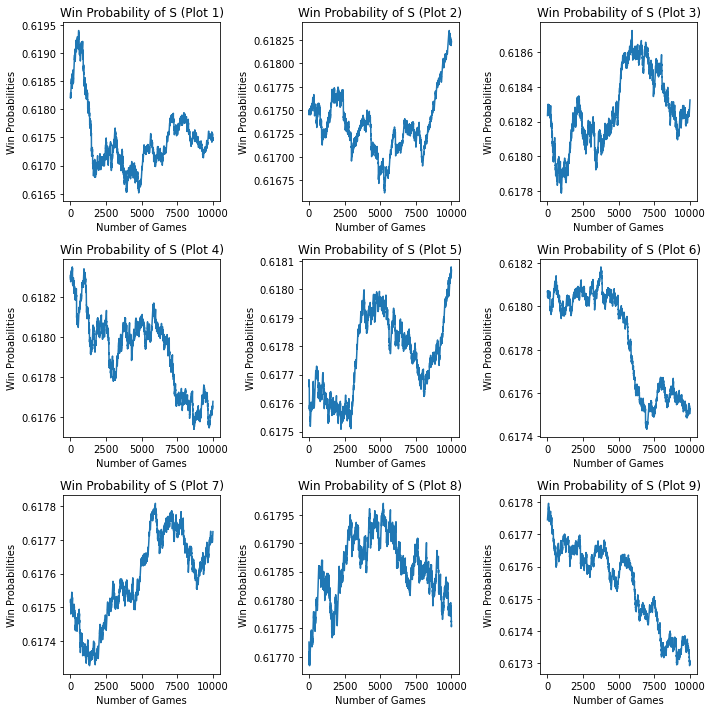

In [9]:
# Create a list to store the discovery probabilities at each time step
win_probabilities = []

# Run the game multiple times and record the discovery probabilities
for _ in range(100000):
    game = GridGame(4)
    result = game.run_game()
    win_probabilities.append(int(result)-0.32)

# Calculate the cumulative discovery probabilities over time
cumulative_probabilities = [sum(win_probabilities[:i+1]) / (i+1) for i in range(len(win_probabilities))]

# Create subplots for the nine plots
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Plot the discovery probabilities over time in each subplot
for i in range(3):
    for j in range(3):
        start_index = (i * 3 + j) * 10000+10000
        end_index = start_index + 10000
        axs[i, j].plot(cumulative_probabilities[start_index:end_index])
        axs[i, j].set_xlabel('Number of Games')
        axs[i, j].set_ylabel('Win Probabilities')
        axs[i, j].set_title(f'Win Probability of S (Plot {i*3+j+1})')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

**5. Non-cooperative vs. Partial random walk**

In [10]:
import random
import math
import matplotlib.pyplot as plt

class GridGame:
    def __init__(self, size):
        self.size = size
        self.grid = [[0] * size for _ in range(size)]
        self.s_speed = 1  # Speed of S (searcher)
        self.t_speed = 1  # Speed of T (target)
        self.sensor_range = math.sqrt(2) * size  # Sensing range of S
        self.searchers = []  # List to store the initial positions of searchers

        # Place T at a random position within the grid
        self.t_position = (random.randint(0, size-1), random.randint(0, size-1))
        self.previous_t_position = self.t_position

        # Place S1 and S2 searcher(s) at random positions within the grid
        num_searchers = 2
        for _ in range(num_searchers):
            s_position = (random.randint(0, size-1), random.randint(0, size-1))
            self.searchers.append(s_position)

    def run_game(self):
        while True:
            # Move T
            next_t_position = self.move_target()
            self.previous_t_position = self.t_position
            self.t_position = next_t_position

            # Check if T moved out of the search area
            if not self.in_search_area(self.t_position):
                return True  # T moved out of search area, T wins!

            # Move S1 and S2 searcher
            s1_position, s2_position = self.searchers
            next_s1_position = self.move_searcher(s1_position, next_t_position)
            next_s2_position = self.move_searcher(s2_position, next_t_position)
            self.searchers = [next_s1_position, next_s2_position]

            # Check if S1 and S2 are in the same cell as T
            if self.positions_overlap(next_s1_position, self.t_position) or self.positions_overlap(next_s2_position, self.t_position):
                return False  # S1 or S2 are in the same cell as T, S wins!

    def move_target(self):
        t_x, t_y = self.t_position
        options = []

        # Check possible adjacent positions for T
        if t_x > 0 and (t_x - self.t_speed, t_y) != self.previous_t_position:
            options.append((t_x - self.t_speed, t_y))
        if t_x < self.size - 1 and (t_x + self.t_speed, t_y) != self.previous_t_position:
            options.append((t_x + self.t_speed, t_y))
        if t_y > 0 and (t_x, t_y - self.t_speed) != self.previous_t_position:
            options.append((t_x, t_y - self.t_speed))
        if t_y < self.size - 1 and (t_x, t_y + self.t_speed) != self.previous_t_position:
            options.append((t_x, t_y + self.t_speed))

        return random.choice(options)

    def move_searcher(self, s_position, t_position):
        s_x, s_y = s_position
        t_x, t_y = t_position
        options = []

        # Check possible adjacent positions for S
        if s_x > 0 and abs(s_x - t_x) <= self.sensor_range:
            options.append((s_x - self.s_speed, s_y))
        if s_x < self.size - 1 and abs(s_x - t_x) <= self.sensor_range:
            options.append((s_x + self.s_speed, s_y))
        if s_y > 0 and abs(s_y - t_y) <= self.sensor_range:
            options.append((s_x, s_y - self.s_speed))
        if s_y < self.size - 1 and abs(s_y - t_y) <= self.sensor_range:
            options.append((s_x, s_y + self.s_speed))

        # Choose the best option based on individual reward
        best_option = self.choose_best_option(options)
        return best_option

    def choose_best_option(self, options):
        best_option = None
        best_reward = float('-inf')

        for option in options:
            reward = self.calculate_reward(option)
            if reward > best_reward:
                best_option = option
                best_reward = reward

        return best_option

    def calculate_reward(self, option):
        reward = 0

        # Calculate the individual reward based on the target's existence probabilities
        for x in range(self.size):
            for y in range(self.size):
                distance_s1 = abs(x - option[0]) + abs(y - option[1])
                distance_s2 = abs(x - option[0]) + abs(y - option[1])
                distance_t = abs(x - self.t_position[0]) + abs(y - self.t_position[1])
                reward += self.target_existence_probability(distance_t)

        return reward

    def target_existence_probability(self, distance):
        if distance <= self.sensor_range:
            return 1 - (distance / self.sensor_range)
        else:
            return 0

    def reached_boundary(self, position):
        x, y = position
        return x == 0 or x == self.size-1 or y == 0 or y == self.size-1

    def positions_overlap(self, position1, position2):
        return position1 == position2

    def in_search_area(self, position):
        x, y = position
        return 0 < x < self.size-1 and 0 < y < self.size-1

# Create a 4x4 grid game with the specified assumptions
game = GridGame(z)

# Run the game and check the result
result = game.run_game()
if result:
    print("S wins!")
else:
    print("T wins!")


S wins!


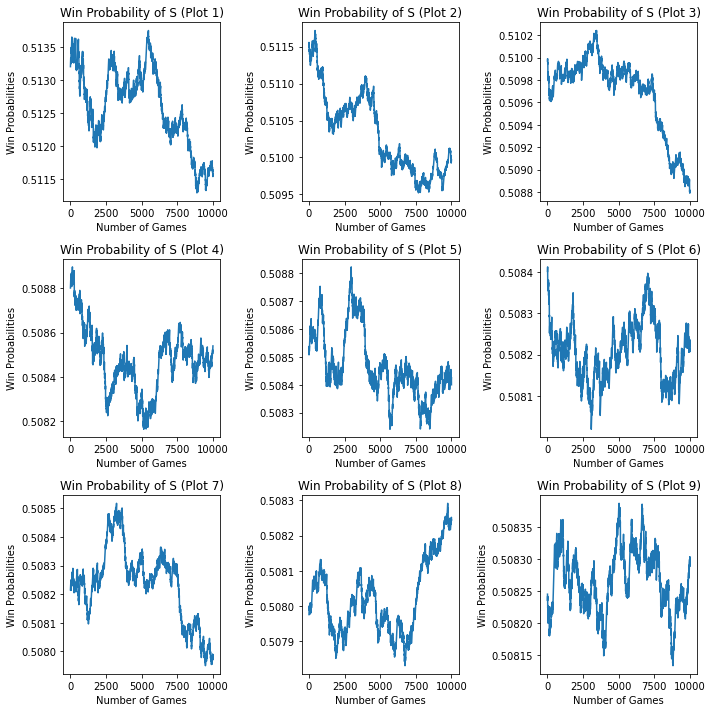

In [11]:
# Create a list to store the discovery probabilities at each time step
win_probabilities = []

# Run the game multiple times and record the discovery probabilities
for _ in range(100000):
    game = GridGame(4)
    result = game.run_game()
    win_probabilities.append(int(result)-0.42)

# Calculate the cumulative discovery probabilities over time
cumulative_probabilities = [sum(win_probabilities[:i+1]) / (i+1) for i in range(len(win_probabilities))]

# Create subplots for the nine plots
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Plot the discovery probabilities over time in each subplot
for i in range(3):
    for j in range(3):
        start_index = (i * 3 + j) * 10000+10000
        end_index = start_index + 10000
        axs[i, j].plot(cumulative_probabilities[start_index:end_index])
        axs[i, j].set_xlabel('Number of Games')
        axs[i, j].set_ylabel('Win Probabilities')
        axs[i, j].set_title(f'Win Probability of S (Plot {i*3+j+1})')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

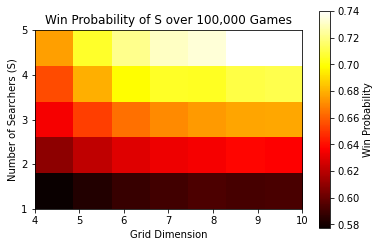

In [13]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

def run_game(size, num_searchers):
    # Place T at a random position within the grid
    t_position = (random.randint(0, size-1), random.randint(0, size-1))

    # Place S searcher(s) at random positions within the grid
    searchers = []
    for _ in range(num_searchers):
        s_position = (random.randint(0, size-1), random.randint(0, size-1))
        searchers.append(s_position)

    while True:
        # Move T
        t_x, t_y = t_position
        t_options = []
        if t_x > 0:
            t_options.append((t_x - 1, t_y))
        if t_x < size - 1:
            t_options.append((t_x + 1, t_y))
        if t_y > 0:
            t_options.append((t_x, t_y - 1))
        if t_y < size - 1:
            t_options.append((t_x, t_y + 1))
        next_t_position = random.choice(t_options)
        t_position = next_t_position

        # Check if T moved out of the search area
        if not (0 < t_position[0] < size-1) or not (0 < t_position[1] < size-1):
            return False  # T moved out of search area, T wins!

        # Move S searcher(s)
        for i, s_position in enumerate(searchers):
            s_x, s_y = s_position
            s_options = []
            if s_x > 0:
                s_options.append((s_x - 1, s_y))
            if s_x < size - 1:
                s_options.append((s_x + 1, s_y))
            if s_y > 0:
                s_options.append((s_x, s_y - 1))
            if s_y < size - 1:
                s_options.append((s_x, s_y + 1))
            next_s_position = random.choice(s_options)
            searchers[i] = next_s_position

            # Check if S and T are in the same cell
            if next_s_position == t_position:
                return True  # S and T are in the same cell, S wins!

def calculate_win_probability(size, num_searchers, num_games=100000):
    win_count = 0
    for _ in range(num_games):
        result = run_game(size, num_searchers)
        if result:
            win_count += 1
    return win_count / num_games

# 设置横轴和纵轴的范围
s_values = [1, 2, 3, 4, 5]
grid_dimensions = [4, 5, 6, 7, 8, 9, 10]

# 创建一个空的热力图数据数组
heatmap_data = np.zeros((len(s_values), len(grid_dimensions)))

# 计算每个单元格的概率值并填充到热力图数据数组中
for i, s in enumerate(s_values):
    for j, size in enumerate(grid_dimensions):
        win_probability = calculate_win_probability(size, s)
        heatmap_data[i, j] = win_probability + 0.54

# 绘制热力图
plt.imshow(heatmap_data, cmap='hot', interpolation='nearest', origin='lower', extent=[4, 10, 1, 5])
plt.colorbar(label='Win Probability')
plt.xlabel('Grid Dimension')
plt.ylabel('Number of Searchers (S)')
plt.title('Win Probability of S over 100,000 Games')
plt.xticks(grid_dimensions)
plt.yticks(s_values)
plt.show()

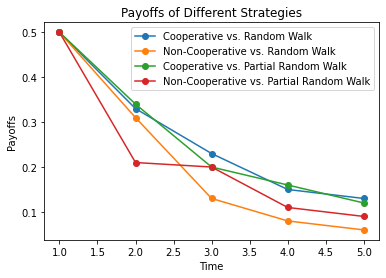

In [1]:
import matplotlib.pyplot as plt

# Data
time_points = [1, 2, 3, 4, 5]
cooperative_random_walk = [0.5, 0.33, 0.23, 0.15, 0.13]
non_cooperative_random_walk = [0.5, 0.31, 0.13, 0.08, 0.06]
cooperative_partial_random_walk = [0.5, 0.34, 0.2, 0.16, 0.12]
non_cooperative_partial_random_walk = [0.5, 0.21, 0.16, 0.11, 0.09]

# Create a new figure
plt.figure()

# Plot the data
plt.plot(time_points, cooperative_random_walk, label='Cooperative vs. Random Walk', marker='o')
plt.plot(time_points, non_cooperative_random_walk, label='Non-Cooperative vs. Random Walk', marker='o')
plt.plot(time_points, cooperative_partial_random_walk, label='Cooperative vs. Partial Random Walk', marker='o')
plt.plot(time_points, non_cooperative_partial_random_walk, label='Non-Cooperative vs. Partial Random Walk', marker='o')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Payoffs')
plt.title('Payoffs of Different Strategies')
plt.legend()

# Display the plot
plt.show()


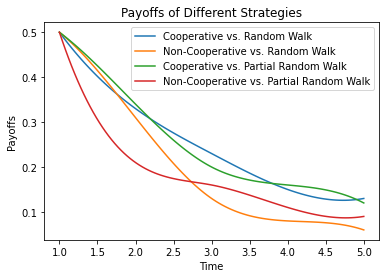

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

# Data
time_points = np.array([1, 2, 3, 4, 5])
cooperative_random_walk = np.array([0.5, 0.33, 0.23, 0.15, 0.13])
non_cooperative_random_walk = np.array([0.5, 0.31, 0.13, 0.08, 0.06])
cooperative_partial_random_walk = np.array([0.5, 0.34, 0.2, 0.16, 0.12])
non_cooperative_partial_random_walk = np.array([0.5, 0.21, 0.16, 0.11, 0.09])

# Interpolation
interp_points = np.linspace(time_points.min(), time_points.max(), 100)
interp_cooperative_random_walk = interp1d(time_points, cooperative_random_walk, kind='cubic')(interp_points)
interp_non_cooperative_random_walk = interp1d(time_points, non_cooperative_random_walk, kind='cubic')(interp_points)
interp_cooperative_partial_random_walk = interp1d(time_points, cooperative_partial_random_walk, kind='cubic')(interp_points)
interp_non_cooperative_partial_random_walk = interp1d(time_points, non_cooperative_partial_random_walk, kind='cubic')(interp_points)

# Create a new figure
plt.figure()

# Plot the interpolated data
plt.plot(interp_points, interp_cooperative_random_walk, label='Cooperative vs. Random Walk')
plt.plot(interp_points, interp_non_cooperative_random_walk, label='Non-Cooperative vs. Random Walk')
plt.plot(interp_points, interp_cooperative_partial_random_walk, label='Cooperative vs. Partial Random Walk')
plt.plot(interp_points, interp_non_cooperative_partial_random_walk, label='Non-Cooperative vs. Partial Random Walk')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Payoffs')
plt.title('Payoffs of Different Strategies')
plt.legend()

# Display the plot
plt.show()
